<center><h1 style="color:#0098E9;"> 3. Calculo de valores propios </h1></center>
  
<center><h3 style="color:#0098E9;"> Manuel A. Sanchez</h3></center>
<center><h3 style="color:#0098E9;"> Pontificia Universidad Catolica de Chile</h3></center>
<hr style="border:2px solid gray"> </hr>

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2 style="color:#FF5CA8;"> Metodo de la potencia </h2>

Calcular valor propio mas grande de $A\in \mathbb R^{n\times n}$

Algoritmo. 
Input: $A, x^{(0)}$ con $\|x^{(0)}\|=1$

for $k=1,2,...$

1. $y = A x^{(k-1)}$
2. $x^{(k)} = y/\|y\|$
3. $\gamma^{(k)} = (v^{(k)})^{T} A v^{(k)}$

In [90]:
MAX_ITER = 20
def power_iteration(A,x0):
    x     = []
    gamma = []
    x0 = x0/np.linalg.norm(x0)
    x.append(x0)
    gamma.append(np.linalg.norm(x0))
    k = 1
    while k < MAX_ITER:
        w = A.dot(x[k-1])
        xk = w/np.linalg.norm(w)
        gammak = xk.dot(A.dot(xk))
        
        x.append(xk)
        gamma.append(gammak)
        k+=1
    return gamma, x

In [109]:
def iteracion_de_potencia(A, x0, TOL=1e-12, MAXITER=100):
    # Algorithm 9.1 (Numerical Analysis, Burden)
    x = x0.copy()
    p = np.argmax(np.abs(x))
    mu = 0
    iter=0
    mulist=[]; xlist=[]
    while np.linalg.norm(A.dot(x)-mu*x)>TOL and iter<MAXITER:
        y = A.dot(x)    
        mu = y[p]/x[p]
        # print(f"iteracion k = {iter}, A^k*x0 = {y}, mu = {mu}")
        p = np.argmax(np.abs(y))
        mulist.append(mu); xlist.append(x)
        x = y
        iter+=1
    return mulist, xlist

## Ejemplo
$$
A =
\begin{bmatrix}
-2& -3 \\
6 & 7
\end{bmatrix}
$$

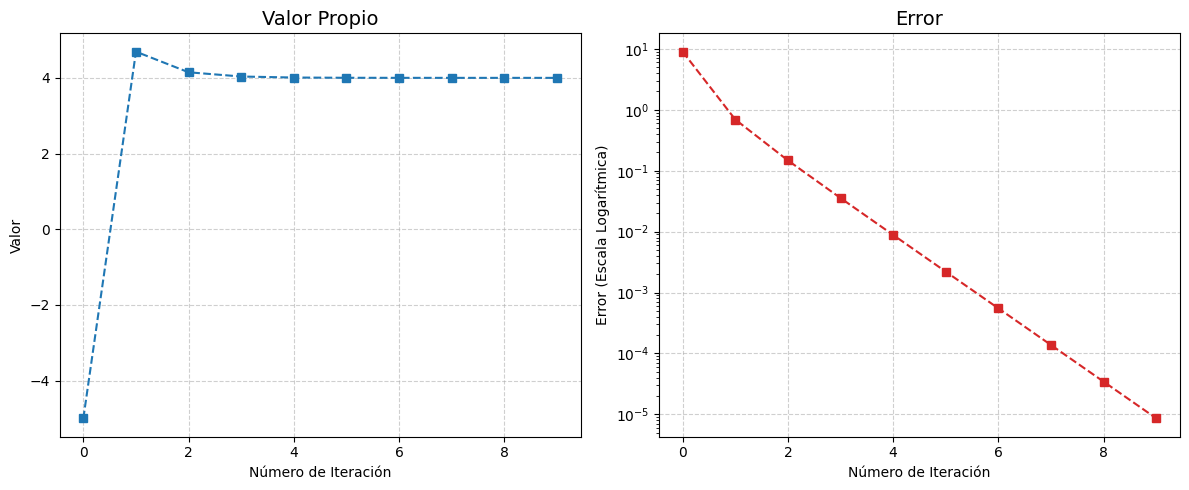

,iteracion k,mu^{(k)},error
0,0,-5.000000,9.000000
1,1,4.692308,0.692308
2,2,4.147541,0.147541
3,3,4.035573,0.035573
4,4,4.008815,0.008815
5,5,4.002199,0.002199
6,6,4.000549,0.000549
7,7,4.000137,0.000137
8,8,4.000034,0.000034
9,9,4.000009,0.000009


In [113]:
A1 = np.array([[-2,-3],[6,7]],dtype=np.float64); x0 = np.ones(2)
mu,x = iteracion_de_potencia(A1, x0, MAXITER=10)
# Convergencia
muexact = 4.0
mu2 = 1.0
error = [np.abs(mu[i]-muexact) for i in range(len(mu))]


# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(mu)), mu, '--s', color='tab:blue')
axs[0].set_title('Valor Propio', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].semilogy(range(len(mu)), error, '--s', color='tab:red')
axs[1].set_title('Error', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Error (Escala Logarítmica)')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

df = pd.DataFrame({'iteracion k': np.arange(len(mu)), 'mu^{(k)}': mu, 'error': error})
df

## Ejemplo

\begin{equation}
A = 
\begin{pmatrix}
-4 & 14 & 0 \\
-5 & 13 & 0 \\
-1 & 0 & 2
\end{pmatrix}
\end{equation}

In [128]:
def iteracion_de_potencia_acelerada(A, x0, TOL=1e-12, MAXITER=100):
    '''
    Convergencia acelerada usando Aitken
    '''
    x = x0.copy()
    p = np.argmax(np.abs(x))
    mu = 0
    iter=0
    mulist=[]; xlist=[]
    # Aitken
    mu0 = 0.0; mu1 = 0.0; muhatlist = []
    while np.linalg.norm(A.dot(x)-mu*x)>TOL and iter<MAXITER:
        y = A.dot(x)    
        mu = y[p]
        muhat = mu0-(mu1-mu0)**2/(mu - 2.0*mu1 + mu0)
        # print(muhat)
        muhatlist.append(muhat);
        mu0 = mu1; mu1 = mu
        # print(f"iteracion k = {iter}, A^k*x0 = {y}, mu = {mu}, muhat = {muhat}")
        p = np.argmax(np.abs(y))
        xlist.append(x)
        x = y/y[p]
        iter+=1
    return muhatlist, xlist

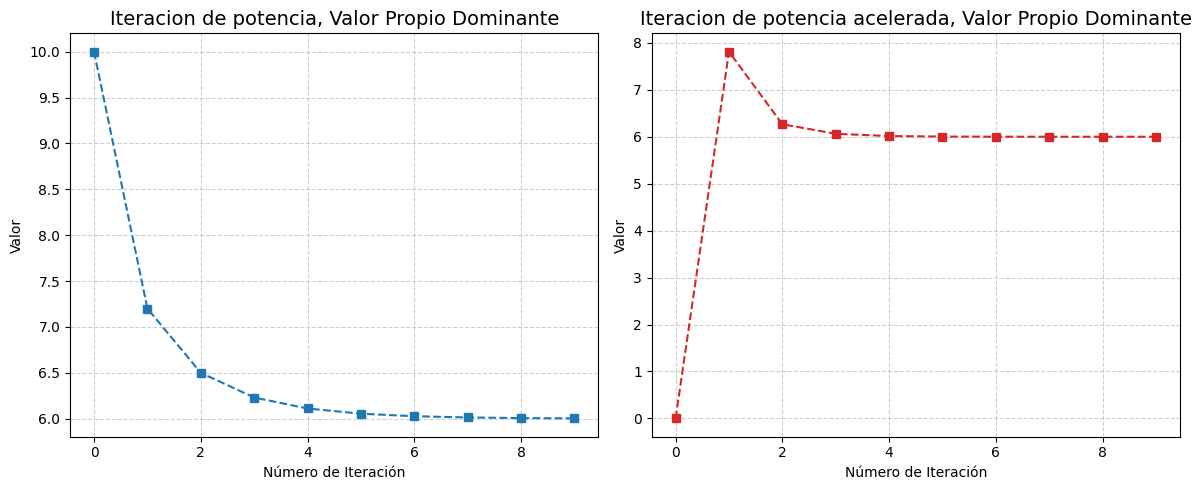

,iteracion k,mu^{(k)},error,muhat^{(k)},errorhat
0,0,10.000000,4.000000,0.000000,6.000000
1,1,7.200000,1.200000,7.812500,1.812500
2,2,6.500000,0.500000,6.266667,0.266667
3,3,6.230769,0.230769,6.062500,0.062500
4,4,6.111111,0.111111,6.015385,0.015385
5,5,6.054545,0.054545,6.003831,0.003831
6,6,6.027027,0.027027,6.000957,0.000957
7,7,6.013453,0.013453,6.000239,0.000239
8,8,6.006711,0.006711,6.000060,0.000060
9,9,6.003352,0.003352,6.000015,0.000015


In [129]:
A2 = np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype=np.float64); x0 = np.ones(3)
# iteracion de potencia
mu,x = iteracion_de_potencia(A2, x0, MAXITER=10)
# iteracion de potencia acelerada
A2 = np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype=np.float64); x0 = np.ones(3)
muhat,x = iteracion_de_potencia_acelerada(A2, x0, MAXITER=10)

# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(mu)), mu, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia, Valor Propio Dominante', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(muhat)), muhat, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia acelerada, Valor Propio Dominante', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()


# Convergencia
muexact = 6.0
error = [np.abs(mu[i]-muexact) for i in range(len(mu))]
errorhat = [np.abs(muhat[i]-muexact) for i in range(len(muhat))]
df = pd.DataFrame({'iteracion k': np.arange(len(mu)), 'mu^{(k)}': mu, 'error': error,  'muhat^{(k)}': muhat, 'errorhat': errorhat })
df

# Matrices simetricas

In [143]:
def iteracion_de_potencia_simetrico(A, x0, TOL=1e-12, MAXITER=100):
    # Algorithm 9.2 (Numerical Analysis, Burden)
    x = x0.copy()
    p = np.argmax(np.abs(x))
    mu = 0
    iter=0; mulist=[]; xlist=[]
    ERR = 1.0
    while ERR>TOL and iter<MAXITER:
        y = A.dot(x)    
        mu = x.dot(y)
        mulist.append(mu); xlist.append(x)
        ERR = np.linalg.norm(x-y/np.linalg.norm(y,2),2)
        x = y/np.linalg.norm(y,2)
        iter+=1
    return mulist, xlist

## Ejemplo
$$
A = \begin{bmatrix}
4 &-1&1 \\
-1 & 3 & -2 \\
1 & -2 & 3 
\end{bmatrix}
$$

C:\Users\Manuel Sánchez\AppData\Local\Temp\ipykernel_5192\2580454283.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  muhat = mu0-(mu1-mu0)**2/(mu - 2.0*mu1 + mu0)


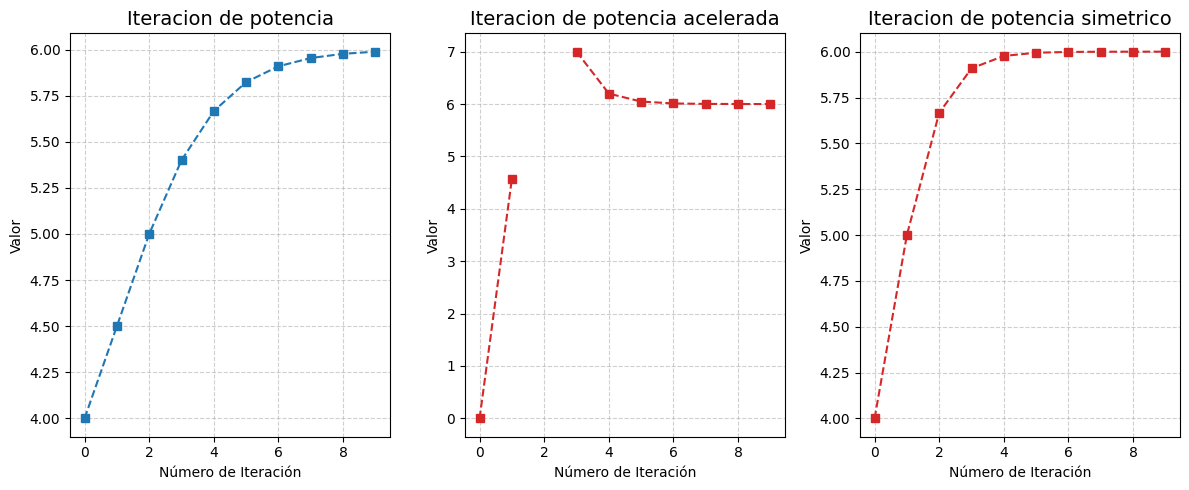

,iteracion k,mu^{(k)},error,"sim, mu^{(k)}",errorsim
0,0,4.000000,2.000000,4.000000,2.000000
1,1,4.500000,1.500000,5.000000,1.000000
2,2,5.000000,1.000000,5.666667,0.333333
3,3,5.400000,0.600000,5.909091,0.090909
4,4,5.666667,0.333333,5.976744,0.023256
5,5,5.823529,0.176471,5.994152,0.005848
6,6,5.909091,0.090909,5.998536,0.001464
7,7,5.953846,0.046154,5.999634,0.000366
8,8,5.976744,0.023256,5.999908,0.000092
9,9,5.988327,0.011673,5.999977,0.000023


In [198]:
A3 = np.array([[4,-1,1],[-1,3,-2],[1,-2,3]],dtype=np.float64); x0 =  np.array([1.0,0.0,0.0])
mu_exact1 = 6.0; mu_exact2 = 3.0; mu_exact3 = 1.0

# Iteracion de potencia
mu, x = iteracion_de_potencia(A3, x0, MAXITER=10)
# Iteracion de potencia acelerada
muhat, x = iteracion_de_potencia_acelerada(A3, x0, MAXITER=10)
# Iteracion de potencia simetrico - cociente de Rayleight
mu_sim,x = iteracion_de_potencia_simetrico(A3, x0, MAXITER=10)

# Figure
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].plot(range(len(mu)), mu, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(muhat)), muhat, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia acelerada', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor')
axs[1].grid(True, linestyle='--', alpha=0.6)

axs[2].plot(range(len(mu_sim)), mu_sim, '--s', color='tab:red')
axs[2].set_title('Iteracion de potencia simetrico', fontsize=14)
axs[2].set_xlabel('Número de Iteración')
axs[2].set_ylabel('Valor')
axs[2].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(); plt.show()

# Convergencia
muexact = 6.0
error = [np.abs(mu[i]-mu_exact1) for i in range(len(mu))]
errorsim = [np.abs(mu_sim[i]-mu_exact1) for i in range(len(mu_sim))]
df = pd.DataFrame({'iteracion k': np.arange(len(mu)), 'mu^{(k)}': mu, 'error': error,  'sim, mu^{(k)}': mu_sim, 'errorsim': errorsim })
df

<h2 style="color:#FF5CA8;"> Metodo de la iteracion inversa </h2>

Algoritmo. 
Input: $A, x^{(0)}$ con $\|x^{(0)}\|=1$

for $k=1,2,...$

1. Resolver $ (A-\mu I)y = x^{(k-1)}$ para $y$
2. $x^{(k)} = y/\|y\|$
3. $\gamma^{(k)} = (v^{(k)})^{T} A v^{(k)}$

In [180]:
def iteracion_de_potencia_inversa(A, x0, TOL=1e-12, MAXITER=100):
    # Algorithm 9.3 (Numerical Analysis, Burden)
    
    x = x0.copy()
    q = x.dot(A.dot(x))/(x.dot(x)); print("q = ", q)
    p = np.argmax(np.abs(x))
    iter=0; mulist=[]; xlist=[]
    ERR  = 1.0
    while ERR>TOL and iter<MAXITER:
        y = A.dot(x)    
        y = np.linalg.solve(A-q*np.eye(A.shape[0]),x)
        mu = y[p]
        p = np.argmax(np.abs(y))
        ERR  = np.linalg.norm( x-y/y[p], np.inf)
        mulist.append(mu); xlist.append(x)
        x = y/y[p]
        iter+=1
    return mulist, xlist

In [199]:
A2 = np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype=np.float64); 
np.linalg.eig(A2)

(array([2., 6., 3.]),
 array([[ 0.        ,  0.79740048,  0.66666667],
        [ 0.        ,  0.56957177,  0.33333333],
        [ 1.        , -0.19935012, -0.66666667]]))

q =  6.333333333333333


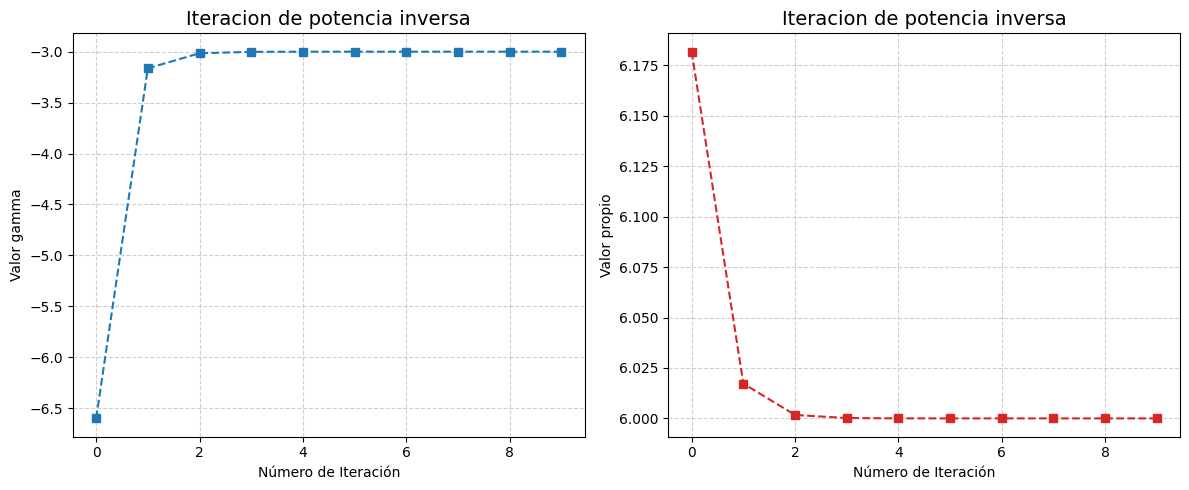

In [189]:
A2 = np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype=np.float64); x0 = np.ones(3); q = x0.dot(A2.dot(x0))/(x0.dot(x0))
gamma,x = iteracion_de_potencia_inversa(A2, x0, MAXITER=10)
mu = [q+ 1/gamma_m for gamma_m in gamma]
# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(gamma)), gamma, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia inversa', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor gamma')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(mu)), mu, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia inversa', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor propio')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

q =  -4.0


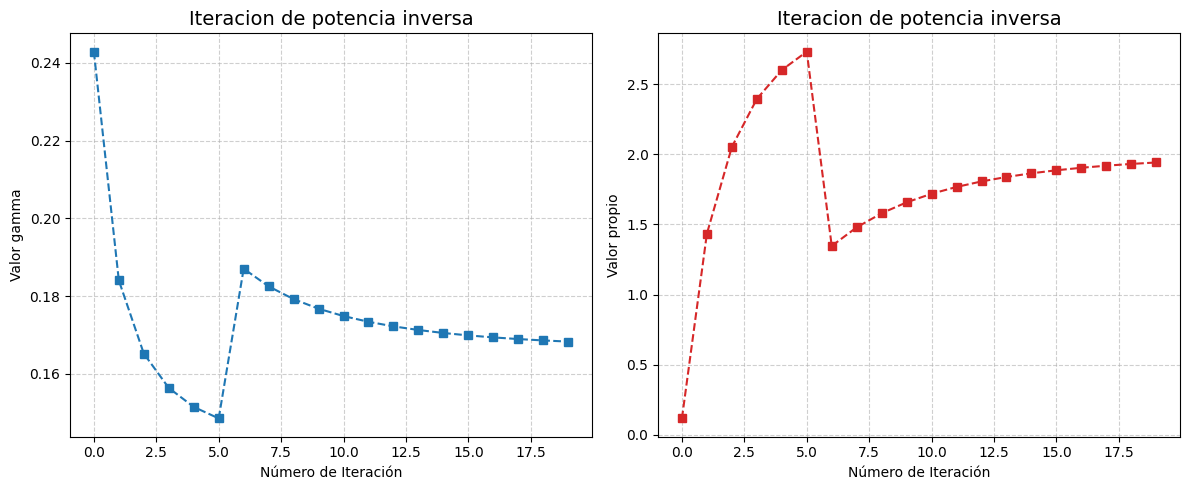

In [190]:
A2 = np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype=np.float64); x0 = np.array([1.0,0,0]); q = x0.dot(A2.dot(x0))/(x0.dot(x0))
gamma,x = iteracion_de_potencia_inversa(A2, x0, MAXITER=20)
mu = [q+ 1/gamma_m for gamma_m in gamma]
# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(gamma)), gamma, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia inversa', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor gamma')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(mu)), mu, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia inversa', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor propio')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

q =  3.642857142857143


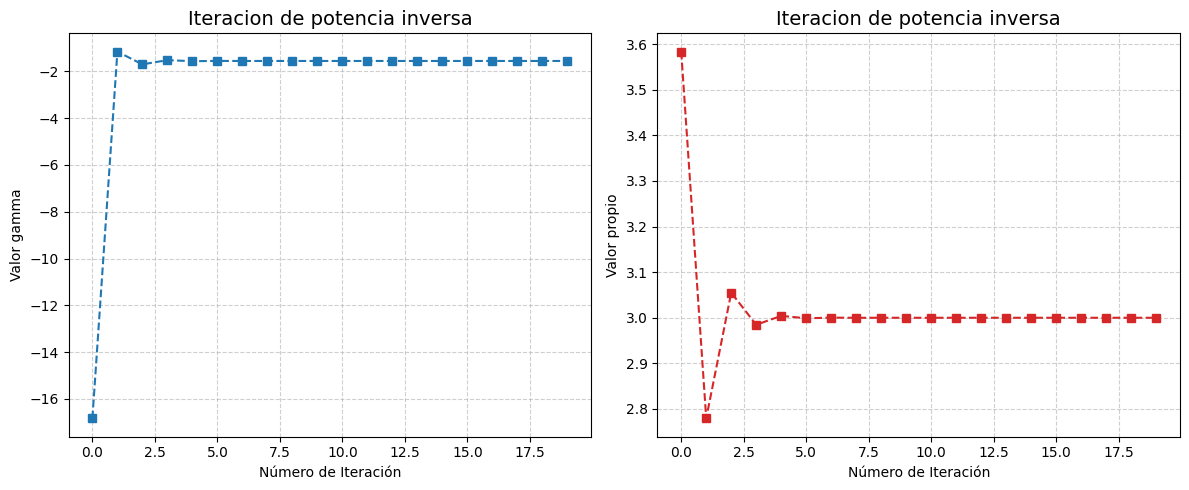

In [191]:
A2 = np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype=np.float64); x0 = np.array([-1.0,2.0,3.0]); q = x0.dot(A2.dot(x0))/(x0.dot(x0))
gamma,x = iteracion_de_potencia_inversa(A2, x0, MAXITER=20)
mu = [q+ 1/gamma_m for gamma_m in gamma]
# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(gamma)), gamma, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia inversa', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor gamma')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(mu)), mu, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia inversa', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor propio')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

## Iteracion de potencia inversa simetrica - con cociente de Rayleight

In [192]:
def iteracion_de_potencia_inversa_simetrico(A, x0, TOL=1e-12, MAXITER=100):
    x = x0.copy()
    q = x.dot(A.dot(x))/(x.dot(x)); print("q = ", q)
    mu = 0
    iter=0; mulist=[]; xlist=[]
    ERR = 1.0
    while ERR>TOL and iter<MAXITER:
        y = np.linalg.solve(A-q*np.eye(A.shape[0]),x)    
        mu = x.dot(y)
        mulist.append(mu); xlist.append(x)
        ERR = np.linalg.norm(x-y/np.linalg.norm(y,2),2)
        x = y/np.linalg.norm(y,2)
        iter+=1
    return mulist, xlist

q =  4.0


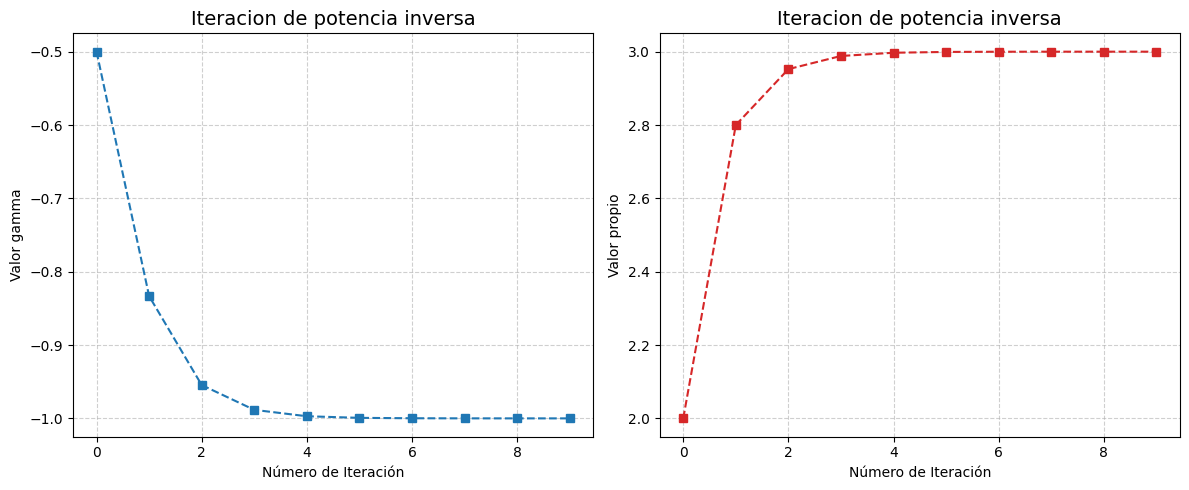

In [193]:
A3 = np.array([[4,-1,1],[-1,3,-2],[1,-2,3]],dtype=np.float64);
mu_exact1 = 6.0; mu_exact2 = 3.0; mu_exact3 = 1.0

x0 =  np.array([1.0,0.0,0.0]); q = x0.dot(A3.dot(x0))/(x0.dot(x0))
gamma1, x = iteracion_de_potencia_inversa_simetrico(A3, x0, TOL=1e-12, MAXITER=10)

mu1 = [q+ 1/gamma_m for gamma_m in gamma1]
# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(gamma1)), gamma1, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia inversa', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor gamma')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(mu1)), mu1, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia inversa', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor propio')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

q =  1.4


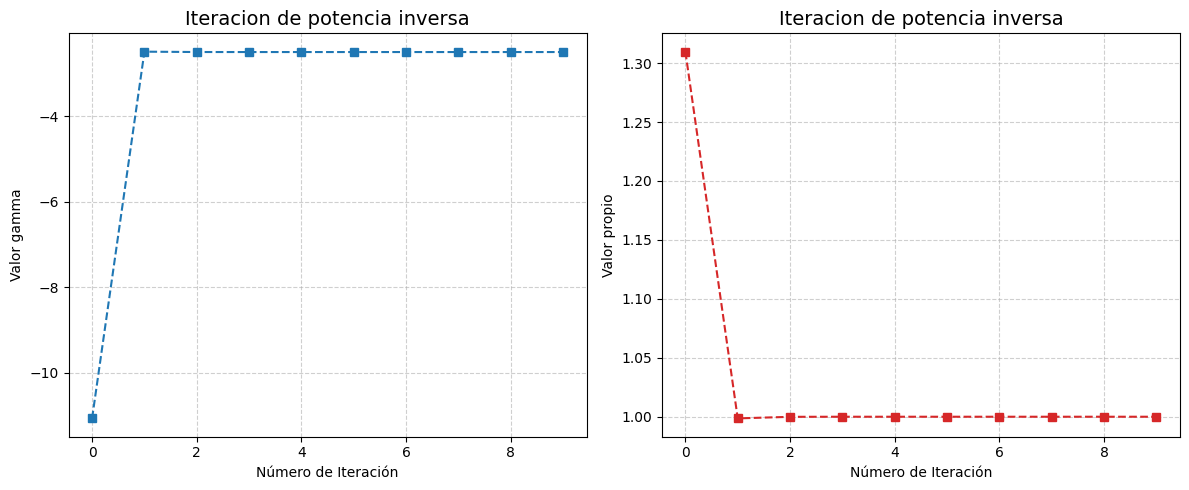

In [196]:
x0 =  np.array([.0,2.0,1.0]); q = x0.dot(A3.dot(x0))/(x0.dot(x0))
gamma1, x = iteracion_de_potencia_inversa_simetrico(A3, x0, TOL=1e-12, MAXITER=10)

mu1 = [q+ 1/gamma_m for gamma_m in gamma1]
# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(gamma1)), gamma1, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia inversa', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor gamma')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(mu1)), mu1, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia inversa', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor propio')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

q =  2.5


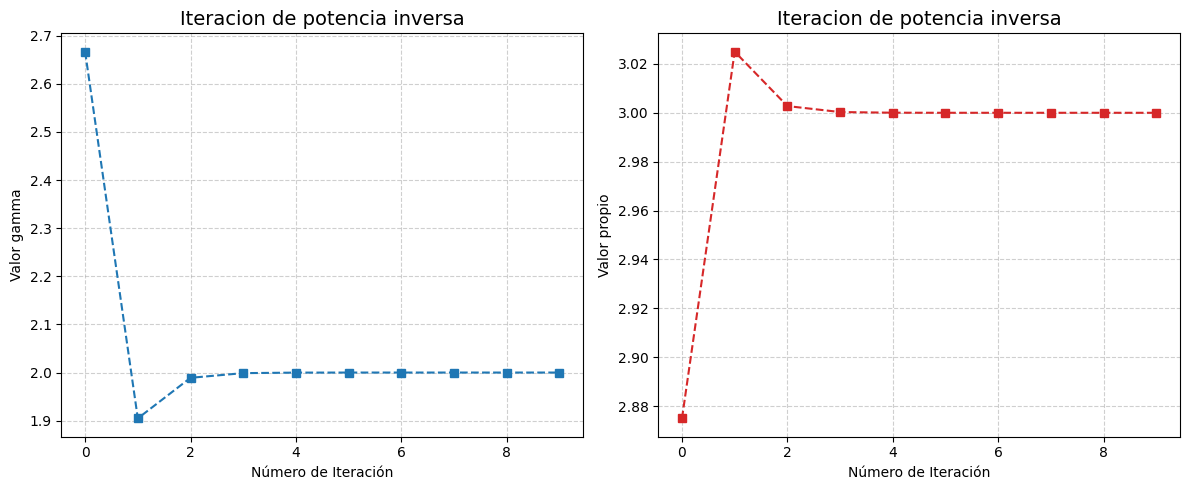

In [197]:
x0 =  np.array([1.0,0.0,-1.0]); q = x0.dot(A3.dot(x0))/(x0.dot(x0))
gamma1, x = iteracion_de_potencia_inversa_simetrico(A3, x0, TOL=1e-12, MAXITER=10)

mu1 = [q+ 1/gamma_m for gamma_m in gamma1]
# Figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(len(gamma1)), gamma1, '--s', color='tab:blue')
axs[0].set_title('Iteracion de potencia inversa', fontsize=14)
axs[0].set_xlabel('Número de Iteración')
axs[0].set_ylabel('Valor gamma')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(range(len(mu1)), mu1, '--s', color='tab:red')
axs[1].set_title('Iteracion de potencia inversa', fontsize=14)
axs[1].set_xlabel('Número de Iteración')
axs[1].set_ylabel('Valor propio')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(); plt.show()

# Tridiagonalizacion de Householder para matrices simetricas

In [220]:
def Householder_tridiagonalizacion(A):
    """
    Tridiagonaliza una matriz simétrica A usando transformaciones de Householder.
    Input: A (np.ndarray): La matriz simétrica de entrada (tamaño n x n).
    Output: H np.ndarray: La matriz tridiagonal similar a A.
    """
    n = A.shape[0]
    H = A.copy()

    for k in range(n - 2):
        yhat = H[k+1:, k]
        norm_yhat = np.linalg.norm(yhat)
        ehat = np.zeros_like(yhat)
        ehat[0] = 1.0
        alpha = -np.sign(yhat[0]) * norm_yhat
        if alpha == 0:
            # Si el subvector x es el vector cero (ya es tridiagonal en esta parte), no se necesita ninguna transformación.
            continue
        what = (yhat - alpha*ehat)/np.linalg.norm(yhat - alpha*ehat,2)
        
        w = np.zeros(n)
        w[k+1:] = what

        # Aplicamos la transformación de Householder a P * H * P, donde P = I - 2 * w * w^T
        P = np.eye(n) - 2.0*np.outer(w,w)
        H = P@H@P
    return H

In [211]:
A = np.array([[4, 1, -2, 2], [1, 2, 0, 1], [-2, 0, 3, -2],[2, 1, -2, -1]], dtype=np.float64)
H = Householder_tridiagonalizacion(A)
print(H)

[[ 4.00000000e+00 -3.00000000e+00  1.33226763e-16 -9.32587341e-16]
 [-3.00000000e+00  3.33333333e+00 -1.66666667e+00  8.88178420e-17]
 [ 1.33226763e-16 -1.66666667e+00 -1.32000000e+00  9.06666667e-01]
 [-9.32587341e-16 -4.44089210e-17  9.06666667e-01  1.98666667e+00]]


In [212]:
Asol =  np.array([[4, -3, 0, 0], [-3, 10.0/3.0, -5.0/3.0, 0], [0, -5.0/3.0, -33.0/25.0, 68.0/75.0],[0, 0, 68.0/75.0, 149.0/75.0]], dtype=np.float64)
print(Asol)

[[ 4.         -3.          0.          0.        ]
 [-3.          3.33333333 -1.66666667  0.        ]
 [ 0.         -1.66666667 -1.32        0.90666667]
 [ 0.          0.          0.90666667  1.98666667]]


In [219]:
# valores propios
(lamA, vecA) = np.linalg.eigh(A)
print("Valores propios de A:", lamA)
(lamH, vecH) = np.linalg.eigh(H)
print("valores propios de H:", lamH)

Valores propios de A: [-2.19751698  1.08436446  2.26853141  6.84462111]
valores propios de H: [-2.19751698  1.08436446  2.26853141  6.84462111]


## Iteracion QR

In [279]:
def iteracion_QR(A,MAX_ITER):
    Ak = A.copy()
    for k in range(MAX_ITER):
        [Q,R] = np.linalg.qr(Ak)
        # [Q,R] = Householder_QR(Ak)
        Ak = R@Q
        # print("Ak:\n",Ak)
    return Ak

## Ejemplo
\begin{equation}
A = 
\begin{pmatrix}
2&1&0 \\
1&3&-1 \\
0&-1&6 
\end{pmatrix}
\end{equation}

In [285]:
A = np.array([[2,1,0],[1,3,-1],[0,-1,6]])
Ak = iteracion_QR(A, 20)
# valores propios
(lamA, vecA) = np.linalg.eigh(A)
print("Valores propios de A:",np.sort(lamA))
lam_approx = np.diag(Ak)
print("valores propios iteracion QR:", np.sort(lam_approx))
print(Ak)

Valores propios de A: [1.31866936 3.35792637 6.32340428]
valores propios iteracion QR: [1.31866936 3.35792637 6.32340427]
[[ 6.32340427e+00  7.53404216e-05 -1.09061507e-15]
 [ 7.53404216e-05  3.35792637e+00 -3.78775098e-08]
 [ 0.00000000e+00 -3.78775093e-08  1.31866936e+00]]


## Ejemplo
\begin{equation}
A = 
\begin{pmatrix}
4&1&0&0&0&0&0 \\
1&6&2&0&0&0&0 \\
0&2&8&3&0&0&0 \\
0&0&3&10&4&0&0 \\
0&0&0&4&12&5&0 \\
0&0&0&0&5&14&6 \\
0&0&0&0&0&6&16
\end{pmatrix}
\end{equation}

In [286]:
A = np.array([[4,1,0,0,0,0,0],[1,6,2,0,0,0,0],[0,2,8,3,0,0,0],[0,0,3,10,4,0,0],[0,0,0,4,12,5,0],[0,0,0,0,5,14,6],[0,0,0,0,0,6,16]], dtype=np.float64)
Ak = iteracion_QR(A, 20)
# valores propios
(lamA, vecA) = np.linalg.eigh(A)
print("Valores propios de A:", np.sort(lamA))
lam_approx = np.diag(Ak)
print("valores propios iteracion QR:", np.sort(lam_approx))

Valores propios de A: [ 3.19304368  4.0266649   5.56787674  7.90035308 11.18215344 15.73418029
 22.39572786]
valores propios iteracion QR: [ 3.19345759  4.02632438  5.5678956   7.90054859 11.18288507 15.7356155
 22.39327326]


In [265]:
def Householder_QR(A):
    """
    Factorizacion usando transformaciones de Householder. (algoritmo con fines ilustrativo no optimo)
    Input: A (np.ndarray): La matriz  (tamaño n x n).
    Output: Q,R np.ndarray: A = Q R.
    """
    n = A.shape[0]
    R = A.copy()

    for k in range(n - 1):
        yhat = R[k:, k]
        norm_yhat = np.linalg.norm(yhat)
        ehat = np.zeros_like(yhat)
        ehat[0] = 1.0
        alpha = -np.sign(yhat[0]) * norm_yhat
        if alpha == 0:
            # Si el subvector x es el vector cero (ya es tridiagonal en esta parte), no se necesita ninguna transformación.
            continue
        what = (yhat - alpha*ehat)/np.linalg.norm(yhat - alpha*ehat,2)
        
        w = np.zeros(n)
        w[k:] = what

        # Aplicamos la transformación de Householder a P * R , donde P = I - 2 * w * w^T
        P = np.eye(n) - 2.0*np.outer(w,w)
        R = P@R
    return R

In [264]:
A = np.array([[2,1,0],[1,3,-1],[0,-1,6]])
[Q,R] = np.linalg.qr(A)
R2 = Householder_QR(A)
print(R)
print(R2)

[[-2.23606798 -2.23606798  0.4472136 ]
 [ 0.         -2.44948974  3.26598632]
 [ 0.          0.          5.1120772 ]]
[[-2.23606798e+00 -2.23606798e+00  4.47213595e-01]
 [ 0.00000000e+00 -2.44948974e+00  3.26598632e+00]
 [ 0.00000000e+00 -2.22044605e-16  5.11207720e+00]]


## Caso no simetrico

In [266]:
def Householder_Hessenberg(A):
    """
    forma de Hessenberg de A usando transformaciones de Householder.
    Input: A (np.ndarray): La matriz simétrica de entrada (tamaño n x n).
    Output: H np.ndarray: La matriz Hessenberg similar a A.
    """
    n = A.shape[0]
    H = A.copy()

    for k in range(n - 2):
        yhat = H[k+1:, k]
        norm_yhat = np.linalg.norm(yhat)
        ehat = np.zeros_like(yhat)
        ehat[0] = 1.0
        alpha = -np.sign(yhat[0]) * norm_yhat
        if alpha == 0:
            # Si el subvector x es el vector cero (ya es tridiagonal en esta parte), no se necesita ninguna transformación.
            continue
        what = (yhat - alpha*ehat)/np.linalg.norm(yhat - alpha*ehat,2)
        
        w = np.zeros(n)
        w[k+1:] = what

        # Aplicamos la transformación de Householder a P * H * P, donde P = I - 2 * w * w^T
        P = np.eye(n) - 2.0*np.outer(w,w)
        H = P@H@P
    return H

## Ejemplo

In [287]:
A = np.array([[4, 1, -2, 5], [1, 2, 0, 1], [-2, 0, 3, -2],[2, 1, -2, -1]], dtype=np.float64)
print(A)
H = Householder_Hessenberg(A)
print(H)

[[ 4.  1. -2.  5.]
 [ 1.  2.  0.  1.]
 [-2.  0.  3. -2.]
 [ 2.  1. -2. -1.]]
[[ 4.00000000e+00 -5.00000000e+00 -2.20000000e+00  4.00000000e-01]
 [-3.00000000e+00  3.33333333e+00 -1.66666667e+00  8.88178420e-17]
 [ 1.33226763e-16 -1.66666667e+00 -1.32000000e+00  9.06666667e-01]
 [-9.32587341e-16 -4.44089210e-17  9.06666667e-01  1.98666667e+00]]


In [278]:
Ak = iteracion_QR(H, 50)
# valores propios
(lamA, vecA) = np.linalg.eig(A)
print("Valores propios de A:", np.sort(lamA))
lam_approx = np.diag(Ak)
print("valores propios iteracion QR:", np.sort(lam_approx))

Valores propios de A: [-2.68383805  0.86957381  2.27265272  7.54161152]
valores propios iteracion QR: [-2.68379496  0.86957381  2.27260963  7.54161152]


## 🐍 Librerías Esenciales de Python para Álgebra Lineal

La librería fundamental para cualquier operación de álgebra lineal en Python es **NumPy**, y dentro de ella, su submódulo `numpy.linalg`. Si necesitás rendimiento superior en matrices muy grandes, **SciPy** ofrece funciones optimizadas.

***

### 1. NumPy

**NumPy** (Numerical Python) es el paquete base para la computación científica en Python. Es ideal para matrices de tamaño pequeño a mediano y es la herramienta estándar para este tipo de cálculo.

| Módulo | Función Principal | Descripción |
| :---: | :---: | :--- |
| `numpy.linalg` | `np.linalg.eig(A)` | Calcula los **valores y vectores propios** de una matriz cuadrada $A$. Devuelve una tupla: *(valores\_propios, vectores\_propios)*. |
| `numpy.linalg` | `np.linalg.eigh(A)` | Para matrices **Hermitianas** (simétricas reales). Es más rápido y numéricamente más estable que `eig()`. |
| `numpy.linalg` | `np.linalg.eigvals(A)` | Calcula solo los **valores propios** (sin los vectores). |

**Ejemplo de Uso (NumPy)**

```python
import numpy as np

# Definición de la matriz
A = np.array([[2, -1], [4, -3]])

# Cálculo de valores y vectores propios
valores, vectores = np.linalg.eig(A)

### 2. SciPy

**SciPy** es una colección de paquetes que se construye sobre NumPy y proporciona herramientas más avanzadas y optimizadas, especialmente para matrices dispersas.

| Módulo | Función Principal | Descripción |
| :---: | :---: | :--- |
|`scipy.linalg` |`scipy.linalg.eig(A)` |	Similar a `numpy.linalg.eig`, pero utiliza implementaciones de librerías de alto rendimiento como **LAPACK**.|
|`scipy.sparse.linalg`|	`scipy.sparse.linalg.eigs(A)`|	Para matrices **dispersas** (sparse matrices). Permite calcular solo un subconjunto de los valores propios (k), siendo eficiente para sistemas masivos.|

```python
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs
import numpy as np

# Definición de una matriz dispersa 4x4 (solo tiene 3 valores distintos de cero)
A_sparse = csc_matrix([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]])

# Cálculo de los 2 (k=2) valores propios más grandes
k = 2
valores_sp, vectores_sp = eigs(A_sparse, k=k)

print("Valores Propios (SciPy - dispersas):", valores_sp)
